In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys

sys.path.append('./../lib')

from sde import Sde
from solver import Solver

In [7]:
# SDE parameters

d = 2

a = np.array([1., 2.])
w = np.array([1., np.pi/2])
p = np.array([np.pi/4., np.pi/2])

t_min = 0.
t_max = 10.
t_poi = 10000

def x_func(t, W=None): # Exact solution
    return a * np.sin(w*t + p)

def s_func(x, t): # Coefficient matrix for random part of ODE
    return np.zeros((d, d))

def f_func(x, t): 
    return a * w * np.cos(w*t + p)

def fx_func(x=None, t=None): # Partial (x-) derivative of rhs for ODE dx / dt = f(x, t)
    return -1. * a * w**2 * np.sin(w*t + p)

x0 = np.array(x_func(t_min))

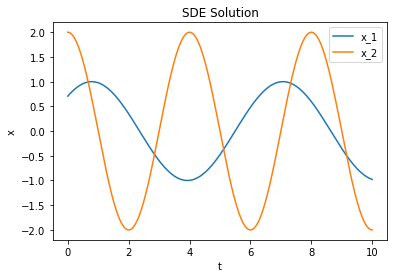

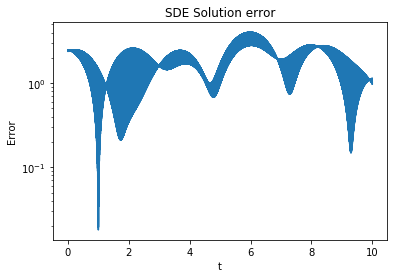

SDE is not ready. Can not plot


In [8]:
EQ = Sde()
EQ.set(d, d, s_func, f_func, fx_func, x0, x_func)
EQ.set_desc(t_min, t_max, t_poi)

SL = Solver(EQ)
SL.solve_ode()

EQ.prep()
EQ.plot_x()
EQ.plot_x_err()
EQ.plot_r()

In [11]:
EQ.x_real

array([[ 7.07106781e-01,  2.00000000e+00,  7.07813605e-01, ...,
         4.71285590e-03, -4.77921707e-01,  1.57095326e-03],
       [-4.77042978e-01, -1.57095326e-03, -4.76163772e-01, ...,
        -1.99999753e+00, -9.77994185e-01, -2.00000000e+00]])

In [12]:
EQ.x_calc

array([[ 0.70710678,  0.70781396,  0.70852043, ..., -0.97711589,
        -0.9773265 , -0.97753613],
       [ 2.        ,  2.        ,  1.99999506, ..., -1.99998437,
        -1.99999424, -1.99999918]])

In [13]:
EQ.x_err2

array([2.47704298, 2.38244224, 2.47615894, ..., 0.98182874, 1.13749253,
       0.97910708])